# Time Series Decomposition 1

Zaman serisi verileri çeşitli kalıplar içerebilir ve bu kalıpları ayrıştırmak genellikle yararlıdır.
İki tür zaman serisi kalıbı vardır. Bunlar;
- Trend
- Mevsimselliktir.

Bu nedenle, bir zaman serisinin üç bileşenden oluştuğunu düşünebiliriz: 
- bir trend döngüsü bileşeni
- bir mevsimsel bileşen 
- ve geriye kalan. 

Bazı zaman serileri için (örneğin, en azından günlük olarak gözlemlenenler), farklı mevsimsel dönemlere karşılık gelen birden fazla mevsimsel bileşen bulunabilir.
Zaman serilerini bileşenlerine ayırmak genellikle zaman serilerinin daha iyi anlaşılmasına yardımcı olmak için yapılır aynı zamanda tahmin doğruluğunu geliştirmek için de kullanılabilir.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df['year'] = df['Month'].dt.year 
df['month'] = df['Month'].dt.month
df['days'] = df['Month'].dt.days_in_month
df.head()

,Month,#Passengers,year,month,days
0,1949-01-01,112,1949,1,31
1,1949-02-01,118,1949,2,28
2,1949-03-01,132,1949,3,31
3,1949-04-01,129,1949,4,30
4,1949-05-01,121,1949,5,31


- *Serideki gözlemler aylık periyotlarla toplanmış. Aylardaki gün sayıları farklılıkları nedeniyle, seride görülen farklılıkları düzeltmek için gün başına yolcu sayısı hesaplanmalı ve bundan sonraki analiz ve modelleme boyunca bu alan kullanılmalıdır.*

In [3]:
df['passengers_per_day'] = df['#Passengers']/df['days']
df.head()

,Month,#Passengers,year,month,days,passengers_per_day
0,1949-01-01,112,1949,1,31,3.612903
1,1949-02-01,118,1949,2,28,4.214286
2,1949-03-01,132,1949,3,31,4.258065
3,1949-04-01,129,1949,4,30,4.300000
4,1949-05-01,121,1949,5,31,3.903226


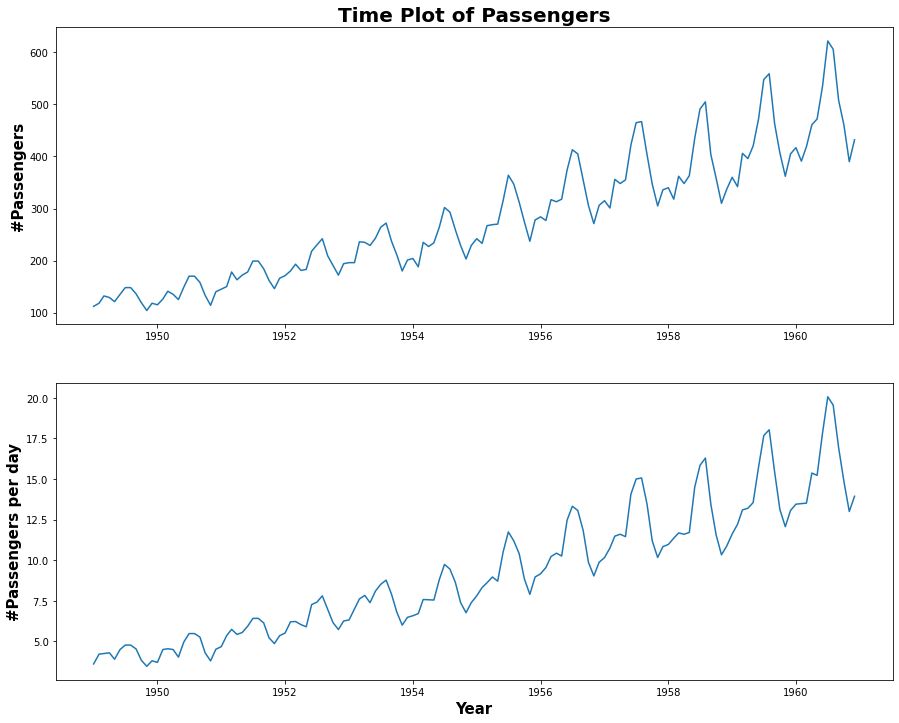

In [4]:
fig, ax = plt.subplots(2,1,figsize=(15, 12))

ax[0].plot(df.Month, df['#Passengers'])

ax[0].set_title('Time Plot of Passengers', fontsize=20, fontdict={'weight':'bold'})
ax[0].set_ylabel("#Passengers", fontsize=15, fontdict={'weight':'bold'})


ax[1].plot(df.Month, df.passengers_per_day)

ax[1].set_xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
ax[1].set_ylabel('#Passengers per day', fontsize=15, fontdict={'weight':'bold'})

plt.show()

- Böylelikle daha basit, öncekine göre daha modellenebilir bir zaman serisi modeli elde ettik.

# Basit Hareketli Ortalama Yumuşatması(Simple Moving Average Smoothing)

Basit hareketli ortalama, seri içerisindeki her gözlem değeri için, önceki birkaç gözlemin ortalamasını kullanır. Basit hareketli ortalama yumuşatması uygulanan serideki ilk m adet gözlem değeri kaybolur

Basit hareketli ortalama yumuşatması, mevsimsel ve düzensiz dalgalanmalar sebebiyle zaman serisinde net olarak gözlenemeyen trendi tahmin etmek için serideki mevsimselliği ortadan kaldırarak seriyi düzleştirmektedir.

In [5]:
df_sma = df.copy()
df_sma['SMA3'] = df['passengers_per_day'].rolling(3).mean()
df_sma['SMA12'] = df['passengers_per_day'].rolling(12).mean()

df_sma.head(15)

,Month,#Passengers,year,month,days,passengers_per_day,SMA3,SMA12
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN
1,1949-02-01,118,1949,2,28,4.214286,NaN,NaN
2,1949-03-01,132,1949,3,31,4.258065,4.028418,NaN
3,1949-04-01,129,1949,4,30,4.300000,4.257450,NaN
4,1949-05-01,121,1949,5,31,3.903226,4.153763,NaN
5,1949-06-01,135,1949,6,30,4.500000,4.234409,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.392473,NaN
7,1949-08-01,148,1949,8,31,4.774194,4.682796,NaN
8,1949-09-01,136,1949,9,30,4.533333,4.693907,NaN
9,1949-10-01,119,1949,10,31,3.838710,4.382079,NaN


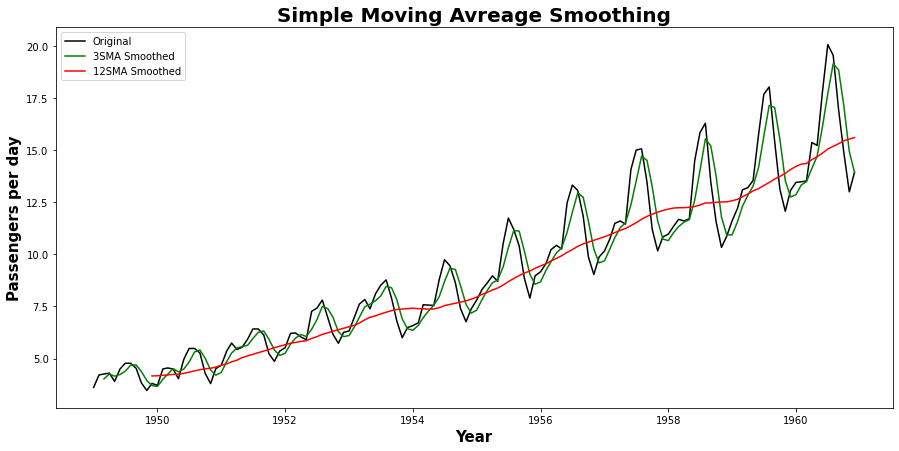

In [6]:
plt.figure(figsize=(15, 7))

plt.plot(df_sma.Month, df_sma.passengers_per_day, color='black')
plt.plot(df_sma.Month, df_sma.SMA3, color='green')
plt.plot(df_sma.Month, df_sma.SMA12, color='red')

plt.title('Simple Moving Avreage Smoothing', fontsize=20, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
plt.ylabel('Passengers per day', fontsize=15, fontdict={'weight':'bold'})
plt.legend(['Original','3SMA Smoothed','12SMA Smoothed'])

plt.show()

# Hareketli Ortalama Yumuşatması (Moving Average Smoothing)

Hareketli ortalama yumuşatması, seri içerisindeki her gözlem değeri için, hem önceki hem sonraki birkaç gözlemin ortalamasını kullanır. Hareketli ortalama yumuşatması uygulanan seriden baştan ve sondan olmak üzere m adet gözlem değeri kaybolur.

In [7]:
df_ma = df.copy()

ma3 = np.empty(df_ma['passengers_per_day'].values.shape)
ma3[:] = np.NaN
ma3[1:-1] = df_ma['passengers_per_day'].rolling(3).mean().iloc[2:].values

df_ma['MA3'] = ma3

In [8]:
ma12 = np.empty(df_ma['passengers_per_day'].values.shape)
ma12[:] = np.NaN

ma12[5:-6] = df_ma['passengers_per_day'].rolling(12).mean().iloc[11:].values

ma12x2 = np.empty(df_ma['passengers_per_day'].values.shape)
ma12x2[:] = np.NaN
ma12x2[2:] = pd.DataFrame(ma12).rolling(2).mean().iloc[2:].values.reshape(142,)

df_ma['MA12'] = ma12x2
df_ma.head(10)

,Month,#Passengers,year,month,days,passengers_per_day,MA3,MA12
0,1949-01-01,112,1949,1,31,3.612903,NaN,NaN
1,1949-02-01,118,1949,2,28,4.214286,4.028418,NaN
2,1949-03-01,132,1949,3,31,4.258065,4.257450,NaN
3,1949-04-01,129,1949,4,30,4.300000,4.153763,NaN
4,1949-05-01,121,1949,5,31,3.903226,4.234409,NaN
5,1949-06-01,135,1949,6,30,4.500000,4.392473,NaN
6,1949-07-01,148,1949,7,31,4.774194,4.682796,4.169201
7,1949-08-01,148,1949,8,31,4.774194,4.693907,4.185138
8,1949-09-01,136,1949,9,30,4.533333,4.382079,4.209140
9,1949-10-01,119,1949,10,31,3.838710,3.946237,4.229570


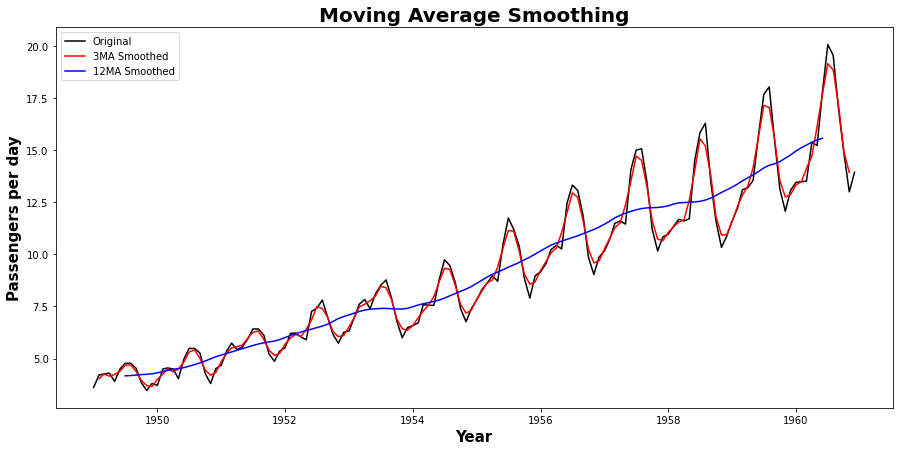

In [9]:
plt.figure(figsize=(15, 7))

plt.plot(df_ma.Month, df_ma.passengers_per_day, color='black')
plt.plot(df_ma.Month, df_ma.MA3, color='red')
plt.plot(df_ma.Month, df_ma.MA12, color= 'blue')

plt.title('Moving Average Smoothing', fontsize=20, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
plt.ylabel('Passengers per day', fontsize=15, fontdict={'weight':'bold'})
plt.legend(['Original','3MA Smoothed','12MA Smoothed'])

plt.show()

# Karşılaştırma

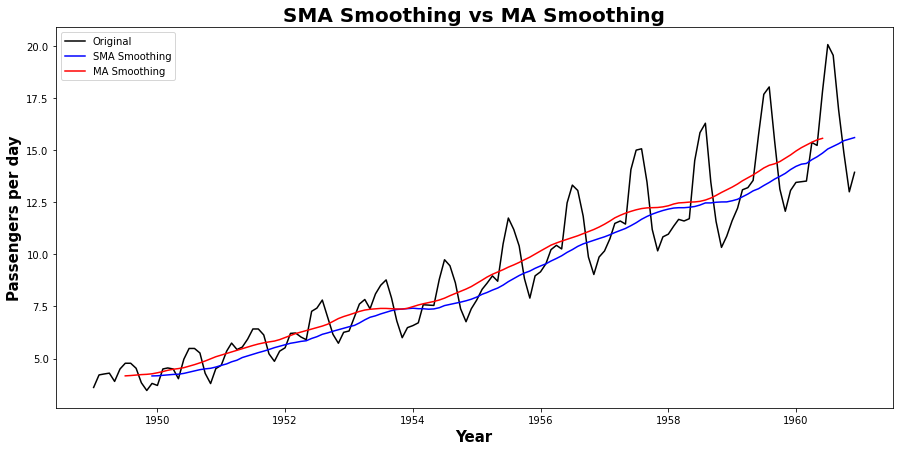

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(df.Month, df.passengers_per_day, color='black')
plt.plot(df_sma.Month, df_sma.SMA12, color='blue')
plt.plot(df_ma.Month, df_ma.MA12, color= "red")

plt.title('SMA Smoothing vs MA Smoothing', fontsize=20, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
plt.ylabel('Passengers per day', fontsize=15, fontdict={'weight':'bold'})
plt.legend(['Original','SMA Smoothing','MA Smoothing'])


plt.show()

- Gerçek serideki mevsimsellikteki değişimlere bakarsanız Ortalama Kareler Yumuşatmasının, Basit Ortalama Kareler Yumuşatmasından daha iyi bir iş başarmış olduğunu görebilirisiniz.